In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
model = LogisticRegression(
    random_state=42,
    max_iter=1000,  
    solver='lbfgs'
)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.3f}')


Точность модели: 0.753


In [9]:
print('\nОтчет по классификации:')
print(classification_report(y_test, y_pred))



Отчет по классификации:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



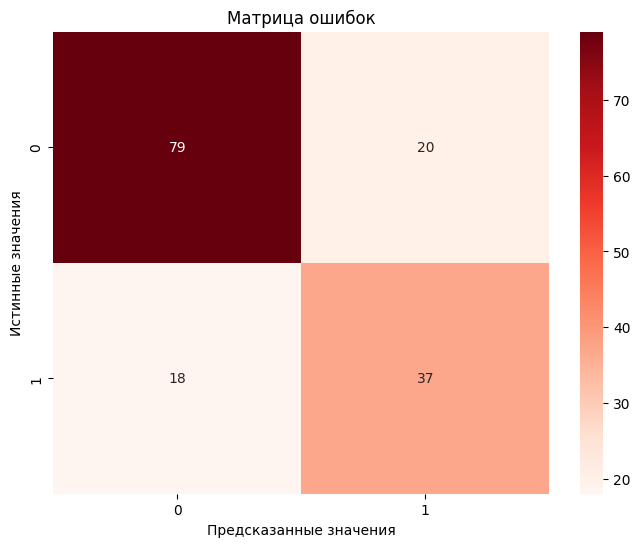

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Матрица ошибок')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [11]:
coefficients = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': model.coef_[0]
})
print('\nКоэффициенты модели:')
print(coefficients.sort_values(by='Коэффициент', ascending=False))


Коэффициенты модели:
                    Признак  Коэффициент
1                   Glucose     1.069330
5                       BMI     0.792371
7                       Age     0.430362
6  DiabetesPedigreeFunction     0.227094
0               Pregnancies     0.216242
3             SkinThickness     0.047203
4                   Insulin    -0.198998
2             BloodPressure    -0.258676
